In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
TRAIN_DATA_PATH = "/content/drive/My Drive/cs189 practicum/cs189 code/pollutionTrain.csv"
TEST_DATA_PATH = "/content/drive/My Drive/cs189 practicum/cs189 code/pollutionTest.csv"

### DATA SETUP

In [3]:
trainPD = pd.read_csv(TRAIN_DATA_PATH)
testPD = pd.read_csv(TEST_DATA_PATH)

trainPD = trainPD.fillna(0)
testPD = testPD.fillna(0)

In [4]:
label_cols = ['target']

# relevant features chosen based on 1) data context and 
# 2) the SequentialFeatureSelector in regression.ipynb. 
feature_cols = [
                'precipitable_water_entire_atmosphere',
                'relative_humidity_2m_above_ground',
                'temperature_2m_above_ground',
                'u_component_of_wind_10m_above_ground',
                'v_component_of_wind_10m_above_ground',
                'L3_NO2_NO2_column_number_density',
                'L3_NO2_NO2_slant_column_number_density',
                'L3_NO2_absorbing_aerosol_index',
                'L3_NO2_tropopause_pressure',
                'L3_O3_O3_column_number_density',
                'L3_CO_CO_column_number_density',
                'L3_CO_cloud_height',
                'L3_CO_H2O_column_number_density',
                'L3_HCHO_tropospheric_HCHO_column_number_density',
                'L3_SO2_SO2_column_number_density',
]

In [5]:
# partition features matrix and target matrix 
X = trainPD[feature_cols]
y = trainPD[label_cols]

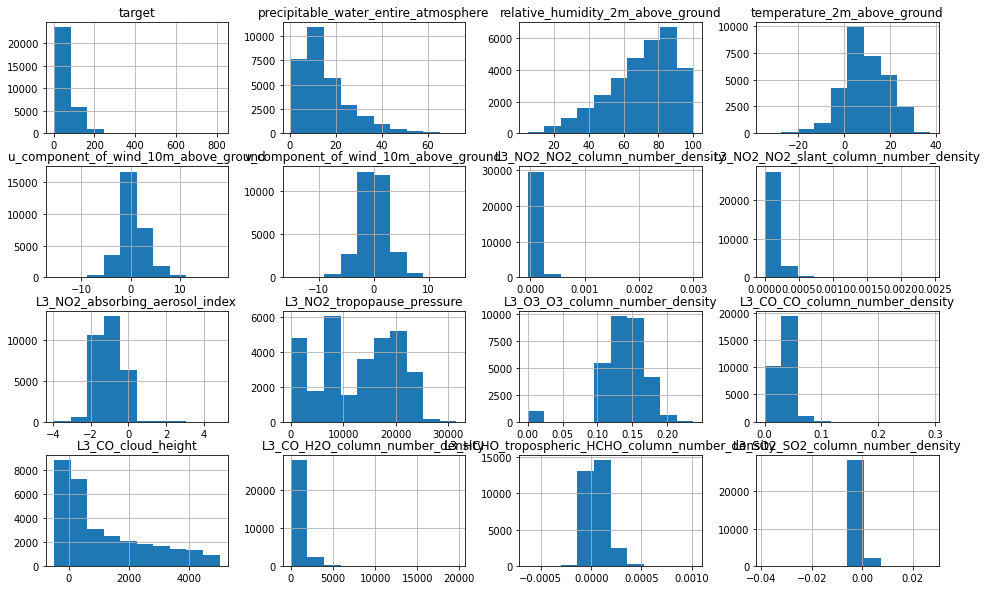

In [7]:
# view histogramm of data
pd.concat([y, X], axis=1).hist(figsize=(16, 10));
plt.show()

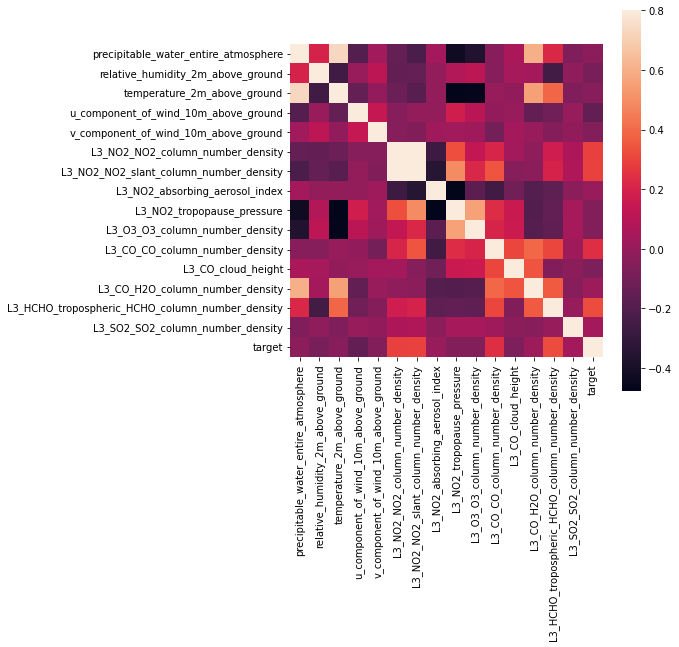

In [8]:
# view correlations between features
correlation_matrix = pd.concat([X, y], axis=1).corr()
fig = plt.figure(figsize=(7,7));
sb.heatmap(correlation_matrix, square=True, vmax=0.8)
plt.show()

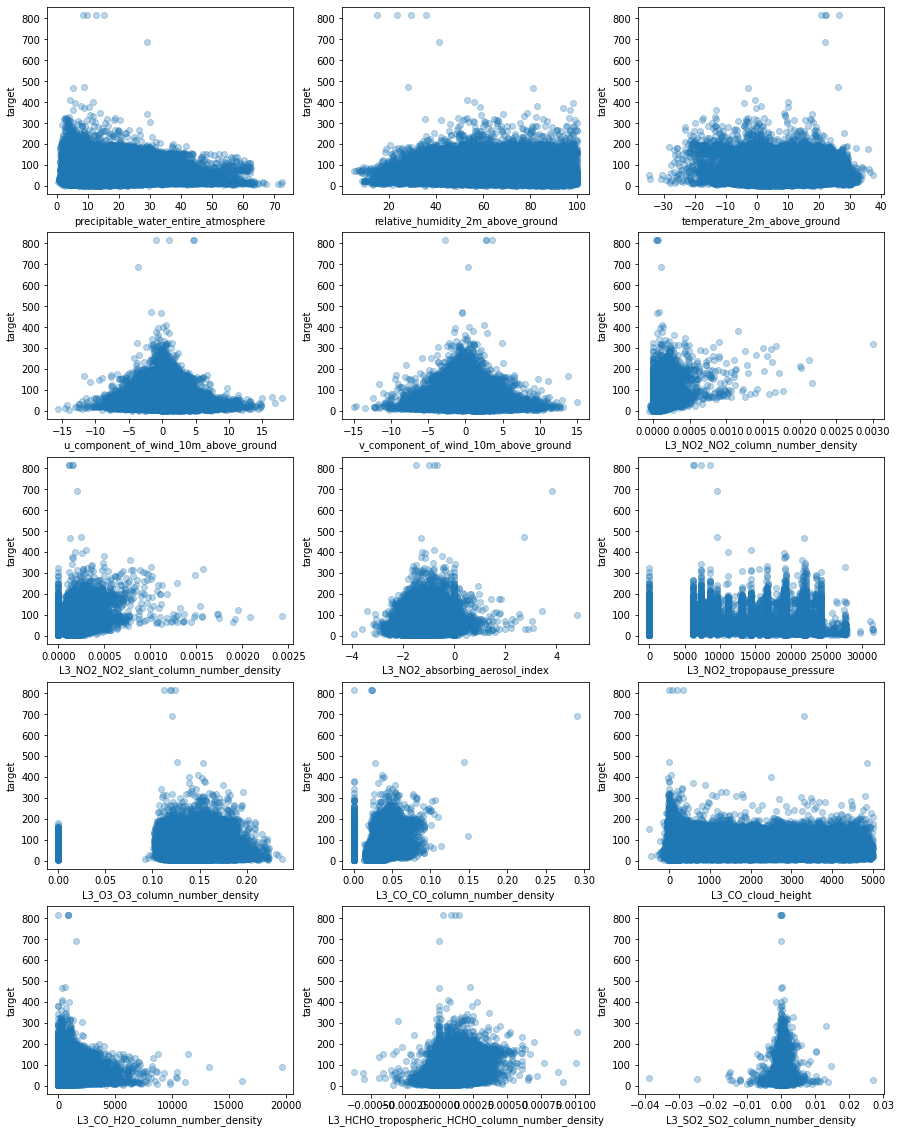

In [10]:
# view scatter plot of features against target
fig = plt.figure(figsize=(15, 20))

for i in range(X.shape[1]):
  ax = fig.add_subplot(5, 3, i+1)
  p = ax.scatter(X.iloc[:, i], y['target'], alpha=0.3);

  ax.set_xlabel(list(X)[i])
  ax.set_ylabel('target')
